# **In this work, we want to find the closest point to a point on the Bezier curve**

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import minimize_scalar

In [2]:
class Bezier:
    def __init__(self, point1, point2, point3, point4):
        """
        Initializes a bezier from the 4 control points provided

        They are control points. They help generate the curve and also controls the shape of the curve.
        
        :param np.ndarray point1:
        :param np.ndarray point2:
        :param np.ndarray point3:
        :param np.ndarray point4:
        """
        self.point1 = point1
        self.point2 = point2
        self.point3 = point3
        self.point4 = point4
    
    def compute(self, t):

        if t > 1 or t < 0:
            raise ValueError('t must be between 0 and 1')
        
        return t ** 3 * self.point4 + 3 * t ** 2 * (1 - t) * self.point3 + 3 * (1 - t) ** 2 * t * self.point2 + (1 - t) ** 3 * self.point1

    
    def bezierDistance(self, t , point):

        """
        This computes the distance of a point from a bezier curve.
        
        """
 
        brezier_poly = self.compute(t)
        
        return np.linalg.norm(brezier_poly - point)

    
    def findClosestPoint(self, point):

        """
        Should return the closes point on Bezier
        :param np.ndarray point:
        :return: np.ndarray representing the closes point
        """

        res = minimize_scalar(self.bezierDistance, args=(point,), bounds=(0, 1), method='bounded')

        return self.compute(res.x)

Now, let us find the closest point on the Bezier curve to [0.5, 0.8]

In [3]:
bezier = Bezier(np.array([0, 0]), np.array([1, 1]), np.array([2, 1]), np.array([3, 0]))
bezier.findClosestPoint(np.array([0.5, 0.8]))

array([0.65980841, 0.5146927 ])

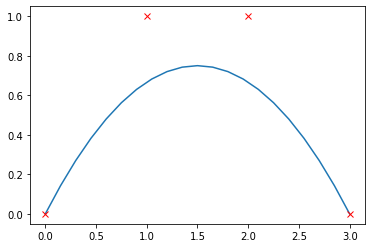

In [4]:
if __name__ == '__main__':

    bezier = Bezier(np.array([0, 0]), np.array([1, 1]), np.array([2, 1]), np.array([3, 0]))

    points = np.array([bezier.compute(t) for t in np.arange(0, 1.05, 0.05)])

    plt.plot(points[:,0], points[:, 1])
    plt.plot(bezier.point1[0], bezier.point1[1], 'xr')
    plt.plot(bezier.point2[0], bezier.point2[1], 'xr')
    plt.plot(bezier.point3[0], bezier.point3[1], 'xr')
    plt.plot(bezier.point4[0], bezier.point4[1], 'xr')
    plt.show()

The red points are control points of the Bézier curve. They are used to generate the curve by interpolating between those points. The intermediate control points determine the shape of the Bézier curve. In our case, the curve is generated by interpolating between the starting control point and the second control point, the second control point and the third control point, the third control point and the last control point. Then finally interpolating between the remaining lines. The curve is of order 3 because we have four control points.